# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [ ]:
# Here are three observations after considering the data: 

# There is a strong correlation between mouse weight and final tumor volume at final timepoint 

# Capomulin and Ramicane have the lower tumor volumes at final timepoint 

# Slightly more male mice were used in the study

In [241]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [242]:
# verifying the side to merge from by seeing the columns and merging left/right, positionality in the code
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [243]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [244]:
# Checking the number of mice.
number_mice = len(pd.unique(combined_df["Mouse ID"]))

# Results same
combined_df["Mouse ID"].nunique()


249

In [245]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. // repeat this // thank you Chithra
combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]
combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [246]:
# Optional: Get all the data for the duplicate mouse ID.
combined_df.loc[combined_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [247]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_drop_duplicate = combined_df.loc[combined_df["Mouse ID"] != "g989"]
combined_drop_duplicate.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [248]:
# Checking the number of mice in the clean DataFrame.
combined_drop_duplicate["Mouse ID"].nunique()

248

## Summary Statistics

In [249]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = combined_drop_duplicate.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_tumor_mean = drug_regimen["Tumor Volume (mm3)"].mean()
drug_tumor_median = drug_regimen["Tumor Volume (mm3)"].median()
drug_tumor_variance = drug_regimen["Tumor Volume (mm3)"].var()
drug_tumor_deviation = drug_regimen["Tumor Volume (mm3)"].std()
drug_tumor_SEM = drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_df = pd.DataFrame({"Mean Tumor Volume": drug_tumor_mean,
              "Mediam Tumor Volume": drug_tumor_median,
              "Tumor Volume Variance": drug_tumor_variance, 
              "Tumor Vaolume Std. Dev.": drug_tumor_deviation,
              "Tumor Volume Std. Err.": drug_tumor_SEM
             })
drug_regimen_df

,Mean Tumor Volume,Mediam Tumor Volume,Tumor Volume Variance,Tumor Vaolume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [250]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen.aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']
             })

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

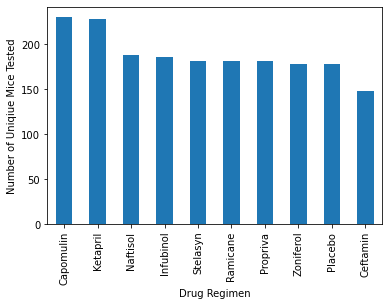

In [251]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# establish x axis values and sort them in descending order 
total_mice = drug_regimen["Mouse ID"].count()
total_mice_descending = total_mice.sort_values(axis=0, ascending=False) 

# set bar plot
bar_plot_total_mice = total_mice_descending.plot(kind="bar", figsize=(6,4))
bar_plot_total_mice

# set the tick labels
bar_plot_total_mice.set_xticklabels(combined_df["Drug Regimen"].unique(), rotation=90)

plt.ylabel("Number of Uniqiue Mice Tested")

plt.show()

In [252]:
drug_regimen.count()["Mouse ID"]
#total_mice
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
# Set x axis and tick locations
#x_axis = np.arange(total_mice_descending)
#x_axis
#tick_locations = [value for value in x_axis]

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

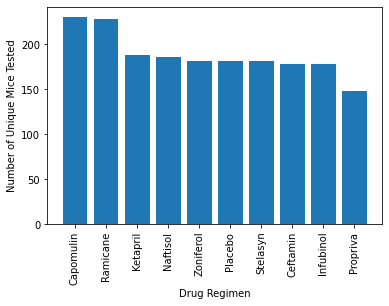

In [253]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

plt.bar(total_mice_descending.index, total_mice_descending)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation= 90)

plt.show()

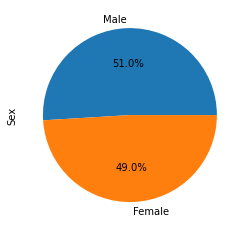

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Index & count for pie chart
combined_drop_duplicate["Sex"].value_counts().index
combined_gender = combined_drop_duplicate["Sex"].value_counts()

combined_gender.plot(kind = "pie", autopct="%1.1f%%")

plt.show()


## Bar and Pie Charts

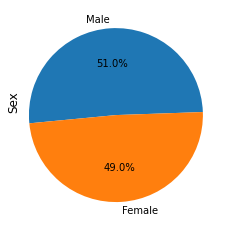

In [255]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(combined_gender, labels = combined_drop_duplicate["Sex"].value_counts().index, autopct="%1.1f%%", startangle=2)

plt.title("Sex", rotation= "vertical", loc= "left", y=.5)

plt.show()

In [256]:
# greatest timepoint // max()
# merge on mouse id and time point 
# Start by getting the last (greatest) timepoint for each mouse
combined_mouse_id = combined_drop_duplicate.groupby("Mouse ID")["Timepoint"].max()
combined_mouse = combined_mouse_id.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_combined = pd.merge(combined_mouse, combined_drop_duplicate, how='inner', on=['Mouse ID', 'Timepoint'])

# combine the original dataframe with a new one 
new_combined


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [257]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = new_combined.loc[new_combined["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_list.append(drug_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    # lower bound / upper bound 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # calculate outliers 
    outliers = (drug_df >= upper_bound) | (drug_df <= lower_bound)
    outliers
    
    drug_df[outliers]
   
    # print
    print(f"The upper bound is {upper_bound} and the lower bound is {lower_bound} for drug {drug}. The iqr is {iqr}. There are {drug_df[outliers]} outliers.")
                           

The upper bound is 51.83201549 and the lower bound is 20.70456164999999 for drug Capomulin. The iqr is 7.781863460000004. There are Series([], Name: Tumor Volume (mm3), dtype: float64) outliers.
The upper bound is 54.30681135 and the lower bound is 17.912664470000003 for drug Ramicane. The iqr is 9.098536719999998. There are Series([], Name: Tumor Volume (mm3), dtype: float64) outliers.
The upper bound is 82.74144559000001 and the lower bound is 36.83290494999999 for drug Infubinol. The iqr is 11.477135160000003. There are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 outliers.
The upper bound is 87.66645829999999 and the lower bound is 25.355449580000002 for drug Ceftamin. The iqr is 15.577752179999997. There are Series([], Name: Tumor Volume (mm3), dtype: float64) outliers.


## Quartiles, Outliers and Boxplots

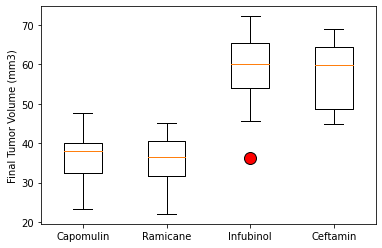

In [258]:
# Adjust settings for outlier marker
flierprops = dict(marker = "o", markerfacecolor = "r", markersize = 12)

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1= plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_list, flierprops = flierprops)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

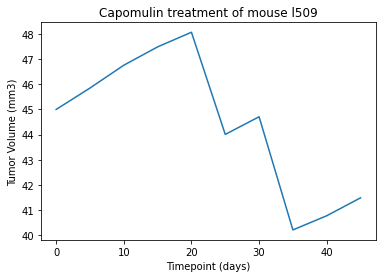

In [259]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_509 = combined_drop_duplicate.loc[combined_drop_duplicate["Mouse ID"] == "l509"]
x_axis = mouse_509["Timepoint"]
y_axis = mouse_509["Tumor Volume (mm3)"]

plt.plot(mouse_509["Timepoint"], mouse_509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

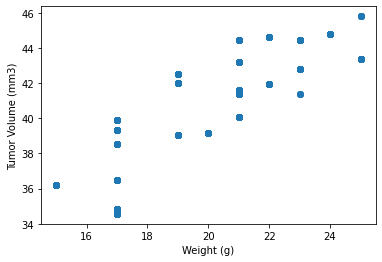

In [260]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
avg_tumor_df = pd.DataFrame(capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

# rename & merge
avg_rename = avg_tumor_df.rename(columns= {"Tumor Volume (mm3)": "Average Tumor Volume"})
avg_final = pd.merge(capomulin, avg_rename, on= "Mouse ID")

# establish x & y axis
x = avg_final["Weight (g)"]
y = avg_final["Average Tumor Volume"]

# create a scatter plot
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


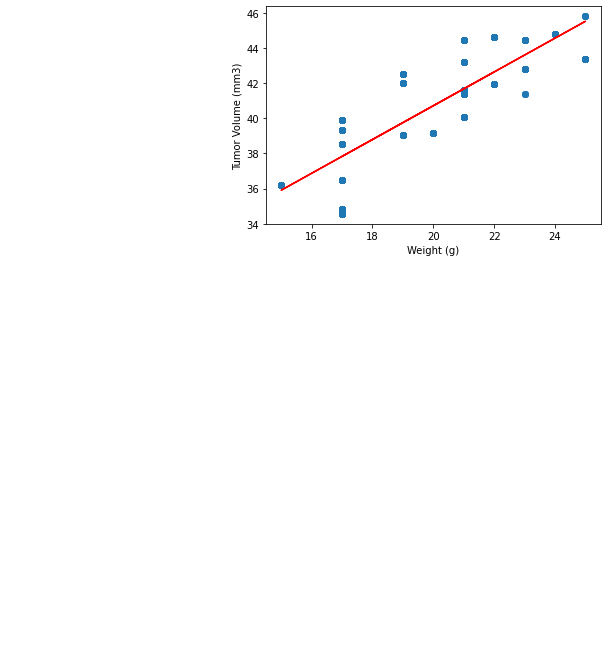

In [261]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = combined_drop_duplicate.loc[combined_drop_duplicate["Drug Regimen"] == "Capomulin"]
avg_tumor_df = pd.DataFrame(capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

# rename & merge
avg_rename = avg_tumor_df.rename(columns= {"Tumor Volume (mm3)": "Average Tumor Volume"})
avg_final = pd.merge(capomulin, avg_rename, on= "Mouse ID")

# establish x & y axis
x = avg_final["Weight (g)"]
y = avg_final["Average Tumor Volume"]

# create a scatter plot
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Add the linear regression equation and line to plot
correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x, slope*x+intercept, "r-")

# print correlation value
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

plt.show()